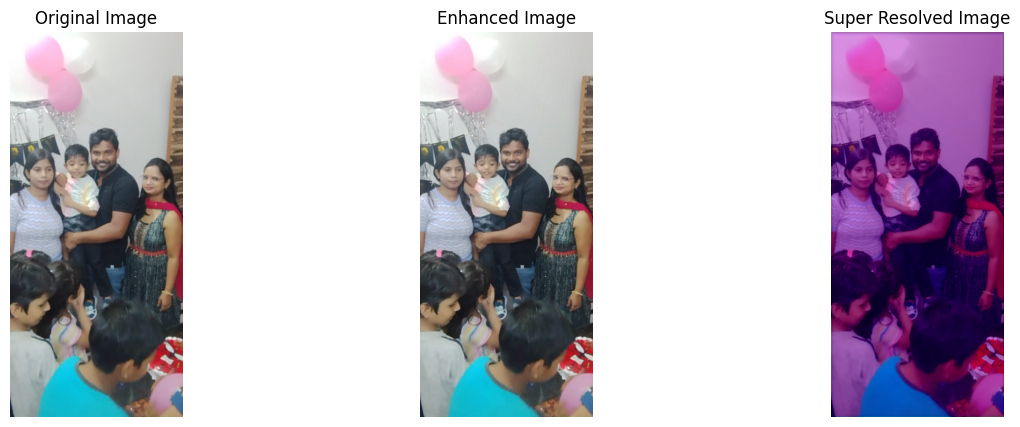

In [17]:
# in this example I have apply the Gaussian Blur 
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
import matplotlib.pyplot as plt

import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

# Load the EDSR pre-trained model
edsr_model = hub.load('https://tfhub.dev/captain-pool/esrgan-tf2/1')

def enhance_image(image):
    # Apply Gaussian Blur 
    image_blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Sharpen the image
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    image_sharpened = cv2.filter2D(image_blurred, -1, kernel)

    return image_sharpened

def super_resolve_image(image):
    # Preprocess the image for the model
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    image = tf.expand_dims(image, 0)  # Add batch dimension
    image = image / 270.0  # Normalize

    # Predict the high-resolution image
    sr_image = edsr_model(image)

    # Post-process the output image
    sr_image = tf.squeeze(sr_image, 0)  # Remove batch dimension
    sr_image = sr_image * 255.0  # Denormalize
    sr_image = tf.clip_by_value(sr_image, 0, 255)
    sr_image = tf.cast(sr_image, tf.uint8)
    sr_image = sr_image.numpy()

    return sr_image

def plot_images(original, enhanced, super_resolved):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title('Enhanced Image')
    plt.imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title('Super Resolved Image')
    plt.imshow(super_resolved)
    plt.axis('off')
    
    plt.show()

# Load an image
image_path = r"C:\\python\\familyimg.jpg"
image = cv2.imread(image_path)

if image is not None:
    # Enhance the image
    enhanced_image = enhance_image(image)
    
    # Super resolve
    super_resolved_image = super_resolve_image(enhanced_image)

    # Plot the results
    plot_images(image, enhanced_image, super_resolved_image)
else:
    print("Error: Image is not loaded. Please check the file path again.")

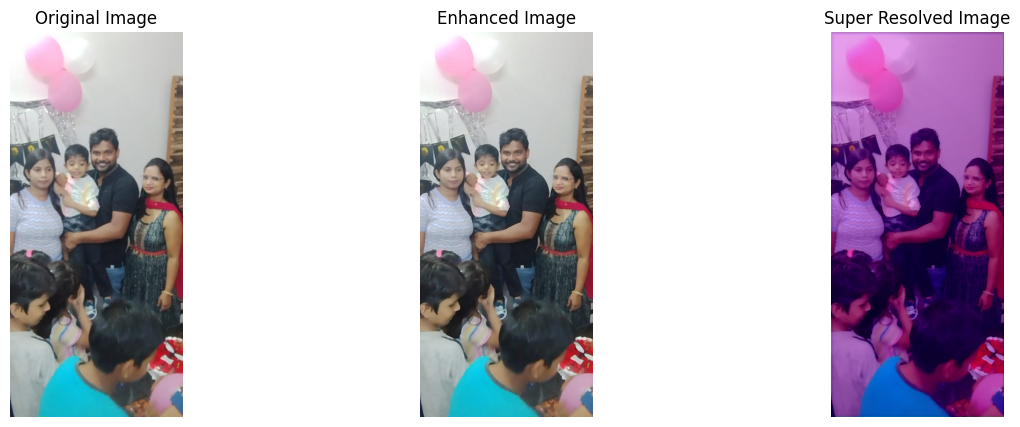

In [9]:
# In this example I have apply the Median Blur
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
import matplotlib.pyplot as plt

import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

# Load the EDSR pre-trained model
edsr_model = hub.load('https://tfhub.dev/captain-pool/esrgan-tf2/1')

def enhance_image(image):
    # Apply Median Blur 
    image_blurred = cv2.medianBlur(image, 5)

    # Sharpen the image 
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    image_sharpened = cv2.filter2D(image_blurred, -1, kernel)

    return image_sharpened

def super_resolve_image(image):
    # Preprocess the image for the model
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    image = tf.expand_dims(image, 0)  
    image = image / 255.0  

    # Predict the high-resolution image
    sr_image = edsr_model(image)

    # Post-process the output image
    sr_image = tf.squeeze(sr_image, 0)  
    sr_image = sr_image * 255.0 
    sr_image = tf.clip_by_value(sr_image, 0, 255)
    sr_image = tf.cast(sr_image, tf.uint8)
    sr_image = sr_image.numpy()

    return sr_image

def plot_images(original, enhanced, super_resolved):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title('Enhanced Image')
    plt.imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title('Super Resolved Image')
    plt.imshow(super_resolved)
    plt.axis('off')
    
    plt.show()

# Load an image
image_path = r"C:\\python\\familyimg.jpg"
image = cv2.imread(image_path)

if image is not None:
    # Enhance the image
    enhanced_image = enhance_image(image)
    
    # Super resolve 
    super_resolved_image = super_resolve_image(enhanced_image)

    # the results
    plot_images(image, enhanced_image, super_resolved_image)
else:
    print("Error: Image is not loaded. Please check the file path again.")
